In [1]:
import numpy as np
import openfermion
from openfermion.chem import MolecularData
from openfermionqchem import run_qchem
import qeom

In [2]:
def print_result(bond,energy):   
    string1,string2 = "Total Energy\n","Excitation Energy\n"
    
    for i in range(len(bond)):
        string1 += "{:4.2f}".format(bond[i])
        string2 += "{:4.2f}".format(bond[i])

        for j in range(len(energy[i])):
            string1 += "{:15.10f}".format(energy[i][j])
        string1 += '\n'

        for j in range(1,len(energy[i])):
            string2 += "{:15.10f}".format((energy[i][j] - energy[i][0]) * 27.211324570273)
        string2 += '\n'
        
    print(string1+'\n'+string2)

## H4/STO-3G

In [3]:
# Set molecule parameters.
# We do not run calculations through OpenFermion directly.
basis        = 'sto-3g'
multiplicity = 1

# Generate molecule at different bond lengths.
bond_length_interval = 0.05
n_points = 14
singlet  = []
triplet  = []
bond_lengths = []

for point in range(n_points):
    bond_length    = 1.75 + point * bond_length_interval
    geometry       = [('H', (0., 0., 0.)), ('H', (0., 0., bond_length))]
    molecule       = MolecularData(geometry, basis, multiplicity)
    directory      = "/Users/yongbinkim/Desktop/venv/publish/qeom-davidson/OpenFermion-QChem/examples/"
    system         = 'H4/eom-ccsd/sto-3g/'+str(round(bond_length,3)).ljust(4,"0")+'/'
    molecule       = run_qchem(molecule,file_directory=directory+system,output_name='test_qis')

    print("r = {:4.2f}".format(bond_length))
    bond_lengths.append(bond_length)
    
    # ground state
    gs = qeom.Adapt_VQE(molecule)
    gs.run()
    
    qeom_davidson = qeom.DavidsonVar(gs=gs)
    
    # singlet
    user_guess = [[[0,1,2,5],[0,1,3,4]],[[0,1,2,7],[0,1,3,6]],[[0,1,4,5]]]
    qeom_davidson.run(nroot=3,user_guess=user_guess,spin='singlet')
    singlet.append(qeom_davidson.energy)

    # triplet
    qeom_davidson.run(nroot=2,spin='triplet')
    triplet.append(qeom_davidson.energy)
    
singlet      = np.array(singlet)
triplet      = np.array(triplet)   
bond_lengths = np.array(bond_lengths)

r = 1.75
*****************************************************
*              Start ADAPT-VQE algorithm            *
* Grimsley, H.R., Economou, S.E., Barnes, E. et al. *
*              Nat Commun 10, 3007 (2019).          *
*     https://doi.org/10.1038/s41467-019-10988-2    *
*       https://github.com/asthanaa/adapt-vqe       *
*****************************************************
 ------------------------------------------------
      Iter   Energy (a.u.)  Gnorm      <S^2>     
 ------------------------------------------------
      1     -1.82952518     0.479      0.00
      2     -1.87614865     0.443      0.00
      3     -1.92577017     0.336      0.00
      4     -1.94379515     0.151      0.00
      5     -1.96292785     0.179      0.00
      6     -1.96520436     0.036      0.00
      7     -1.96526312     0.002     -0.00
      8     -1.96526312*    0.000     -0.00
 ------------------------------------------------
 SCF energy                   = -1.76954677
 ADAPT-VQE correl

 Initial guess vectors
 |b2> =  + 0.70711|11010010> + 0.70711|11100001>
      1     2     2       0.1986      -1.6596153251            8.4164494413
      2     2     4       0.0000      -1.8518606448            3.1851996511
 -------------------------------------------------------------------------------------
   Root #    a.u.       eV       <S^2>    Wavefunction
 -------------------------------------------------------------------------------------
     1   -1.901066    1.846245   2.00  - 0.33315|01110010> - 0.33315|10110001> + 0.62371|11011000> + 0.62371|11100100>
     2   -1.851861    3.185200   2.00  - 0.49179|01111000> - 0.49179|10110100> + 0.50808|11010010> + 0.50808|11100001>

 qEOM-Davidson calculation: 0.78 s

r = 1.85
*****************************************************
*              Start ADAPT-VQE algorithm            *
* Grimsley, H.R., Economou, S.E., Barnes, E. et al. *
*              Nat Commun 10, 3007 (2019).          *
*     https://doi.org/10.1038/s41467-019-10988-

      2     1     4       0.0000      -1.8984047140            2.0968242659
 Initial guess vectors
 |b2> =  + 0.70711|11010010> + 0.70711|11100001>
      1     2     2       0.2038      -1.6663141857            8.4123149595
      2     2     4       0.0000      -1.8635286752            3.0458474756
 -------------------------------------------------------------------------------------
   Root #    a.u.       eV       <S^2>    Wavefunction
 -------------------------------------------------------------------------------------
     1   -1.898405    2.096824   2.00  - 0.35989|01110010> - 0.35989|10110001> + 0.60867|11011000> + 0.60867|11100100>
     2   -1.863529    3.045847   2.00  - 0.49154|01111000> - 0.49154|10110100> + 0.50832|11010010> + 0.50832|11100001>

 qEOM-Davidson calculation: 1.37 s

r = 1.95
*****************************************************
*              Start ADAPT-VQE algorithm            *
* Grimsley, H.R., Economou, S.E., Barnes, E. et al. *
*              Nat Commun

      2     1     4       0.0000      -1.8962639830            2.2994250866
 Initial guess vectors
 |b2> =  + 0.70711|11010010> + 0.70711|11100001>
      1     2     2       0.2080      -1.6696411597            8.4661322889
      2     2     4       0.0000      -1.8709852632            2.9872925368
 -------------------------------------------------------------------------------------
   Root #    a.u.       eV       <S^2>    Wavefunction
 -------------------------------------------------------------------------------------
     1   -1.896264    2.299425   2.00  - 0.37956|01110010> - 0.37956|10110001> + 0.59660|11011000> + 0.59660|11100100>
     2   -1.870985    2.987293   2.00  - 0.49177|01111000> - 0.49177|10110100> + 0.50810|11010010> + 0.50810|11100001>

 qEOM-Davidson calculation: 0.64 s

r = 2.05
*****************************************************
*              Start ADAPT-VQE algorithm            *
* Grimsley, H.R., Economou, S.E., Barnes, E. et al. *
*              Nat Commun

      2     1     4       0.0000      -1.8943513618            2.4633542253
 Initial guess vectors
 |b2> =  + 0.70711|11010010> + 0.70711|11100001>
      1     2     2       0.2119      -1.6708184734            8.5459802017
      2     2     4       0.0000      -1.8761963768            2.9573754135
 -------------------------------------------------------------------------------------
   Root #    a.u.       eV       <S^2>    Wavefunction
 -------------------------------------------------------------------------------------
     1   -1.894351    2.463354   2.00  - 0.39749|01110010> - 0.39749|10110001> + 0.58481|11011000> + 0.58481|11100100>
     2   -1.876196    2.957375   2.00  - 0.49219|01111000> - 0.49219|10110100> + 0.50769|11010010> + 0.50769|11100001>

 qEOM-Davidson calculation: 0.67 s

r = 2.15
*****************************************************
*              Start ADAPT-VQE algorithm            *
* Grimsley, H.R., Economou, S.E., Barnes, E. et al. *
*              Nat Commun

      2     1     4       0.0000      -1.8928025661            2.5902062405
 Initial guess vectors
 |b2> =  + 0.70711|11010010> + 0.70711|11100001>
      1     2     2       0.2157      -1.6705240525            8.6386990203
      2     2     4       0.0000      -1.8798883189            2.9416200124
 -------------------------------------------------------------------------------------
   Root #    a.u.       eV       <S^2>    Wavefunction
 -------------------------------------------------------------------------------------
     1   -1.892803    2.590206   2.00  - 0.41364|01110010> - 0.41364|10110001> + 0.57350|11011000> + 0.57350|11100100>
     2   -1.879888    2.941620   2.00  - 0.49242|01111000> - 0.49242|10110100> + 0.50746|11010010> + 0.50746|11100001>

 qEOM-Davidson calculation: 0.74 s

r = 2.25
*****************************************************
*              Start ADAPT-VQE algorithm            *
* Grimsley, H.R., Economou, S.E., Barnes, E. et al. *
*              Nat Commun

      2     1     4       0.0000      -1.8916129242            2.6857113998
 Initial guess vectors
 |b2> =  + 0.70711|11010010> + 0.70711|11100001>
      1     2     2       0.2193      -1.6692228254            8.7372405601
      2     2     4       0.0000      -1.8825160370            2.9332497510
 -------------------------------------------------------------------------------------
   Root #    a.u.       eV       <S^2>    Wavefunction
 -------------------------------------------------------------------------------------
     1   -1.891613    2.685711   2.00  - 0.42752|01110010> - 0.42752|10110001> + 0.56323|11011000> + 0.56323|11100100>
     2   -1.882516    2.933250   2.00  - 0.49297|01111000> - 0.49297|10110100> + 0.50693|11010010> + 0.50693|11100001>

 qEOM-Davidson calculation: 0.65 s

r = 2.35
*****************************************************
*              Start ADAPT-VQE algorithm            *
* Grimsley, H.R., Economou, S.E., Barnes, E. et al. *
*              Nat Commun

      2     2     4       0.0000      -1.8843861153            2.9288580447
 -------------------------------------------------------------------------------------
   Root #    a.u.       eV       <S^2>    Wavefunction
 -------------------------------------------------------------------------------------
     1   -1.890728    2.756279   2.00  - 0.43968|01110010> - 0.43968|10110001> + 0.55379|11011000> + 0.55379|11100100>
     2   -1.884386    2.928858   2.00  - 0.49367|01111000> - 0.49367|10110100> + 0.50625|11010010> + 0.50625|11100001>

 qEOM-Davidson calculation: 0.36 s



In [4]:
print("singlet")
print_result(bond_lengths,singlet)

singlet
Total Energy
1.75  -1.9652631233  -1.8081048826  -1.5871402110  -1.4491151650
1.80  -1.9689148382  -1.8064783277  -1.5796811549  -1.4521166097
1.85  -1.9723281769  -1.8036770918  -1.5709048824  -1.4536915583
1.90  -1.9754617591  -1.8012684418  -1.5625964093  -1.4541919017
1.95  -1.9782728236  -1.7988444270  -1.5543565562  -1.4539872860
2.00  -1.9807664879  -1.7965386119  -1.5462604795  -1.4532410529
2.05  -1.9829603171  -1.7944201698  -1.5383617249  -1.4520702252
2.10  -1.9848781650  -1.7925205157  -1.5306991081  -1.4505629280
2.15  -1.9865462555  -1.7908445876  -1.5232988493  -1.4487869015
2.20  -1.9879911055  -1.7893839707  -1.5161803945  -1.4467966778
2.25  -1.9892381735  -1.7881211263  -1.5093552771  -1.4446372446
2.30  -1.9903112215  -1.7870374439  -1.5028316019  -1.4423449727
2.35  -1.9912319226  -1.7861115551  -1.4966145367  -1.4399507688
2.40  -1.9920199071  -1.7853237131  -1.4907038361  -1.4374813146

Excitation Energy
1.75   4.2764838969  10.2892252942  14.0450696216


In [5]:
print("triplet")
print_result(bond_lengths,triplet)

triplet
Total Energy
1.75  -1.9652631233  -1.9021325463  -1.8434999421
1.80  -1.9689148382  -1.9010664247  -1.8518606448
1.85  -1.9723281769  -1.8994417884  -1.8585895988
1.90  -1.9754617591  -1.8984047140  -1.8635286752
1.95  -1.9782728236  -1.8973237508  -1.8675999440
2.00  -1.9807664879  -1.8962639830  -1.8709852632
2.05  -1.9829603171  -1.8952660365  -1.8738177287
2.10  -1.9848781650  -1.8943513618  -1.8761963768
2.15  -1.9865462555  -1.8935294580  -1.8781995131
2.20  -1.9879911055  -1.8928025661  -1.8798883189
2.25  -1.9892381735  -1.8921654598  -1.8813135620
2.30  -1.9903112215  -1.8916129242  -1.8825160370
2.35  -1.9912319226  -1.8911366824  -1.8835306486
2.40  -1.9920199071  -1.8907282959  -1.8843861153

Excitation Energy
1.75   1.7178666223   3.3133374462
1.80   1.8462452024   3.1851996511
1.85   1.9833351747   3.0949773664
1.90   2.0968242659   3.0458474756
1.95   2.2027314934   3.0115556489
2.00   2.2994250866   2.9872925368
2.05   2.3862775331   2.9699143983
2.10   2.463354

In [6]:
fci_energies = np.array([[-1.965263123,-1.908634752,-1.849795572,-1.818602242,-1.593438758,-1.450829873],
                         [-1.968914838,-1.906152050,-1.855553805,-1.813583235,-1.584203258,-1.452706681],
                         [-1.972338803,-1.903881184,-1.860498878,-1.809010509,-1.575092604,-1.453789849],
                         [-1.975466301,-1.901831712,-1.864740139,-1.804939588,-1.566157831,-1.454196242],
                         [-1.978274757,-1.900003261,-1.868372947,-1.801371968,-1.557439766,-1.454028039],
                         [-1.980767298,-1.898388234,-1.871480470,-1.798280085,-1.548970554,-1.453374521],
                         [-1.982960646,-1.896973923,-1.874135029,-1.795622094,-1.540774819,-1.452313431],
                         [-1.984878291,-1.895744554,-1.876399589,-1.793350847,-1.532870971,-1.450912492],
                         [-1.986546299,-1.894682638,-1.878328745,-1.791418790,-1.525272127,-1.449230438],
                         [-1.987991118,-1.893770289,-1.879969925,-1.789780942,-1.517987213,-1.447318252],
                         [-1.989238176,-1.892989944,-1.881364149,-1.788396124,-1.511021751,-1.445219994],
                         [-1.990311222,-1.892325015,-1.882546933,-1.787227656,-1.504378706,-1.442973732],
                         [-1.991231923,-1.891760110,-1.883548845,-1.786243226,-1.498059111,-1.440612182],
                         [-1.992019909,-1.891281399,-1.884396320,-1.785414899,-1.492062858,-1.438163580]])

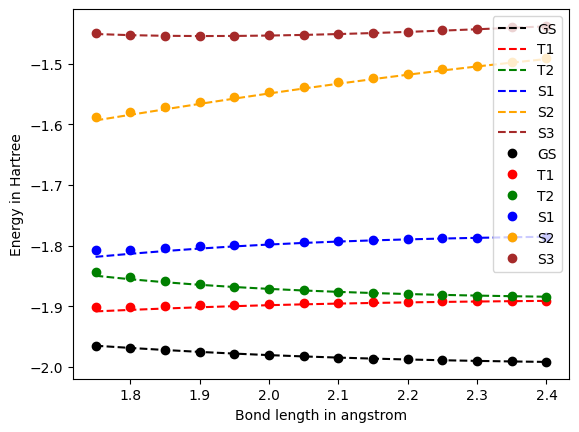

In [7]:
# Plot.
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(0)
plt.plot(bond_lengths, fci_energies[:,0], '--', label='GS', color='black')
plt.plot(bond_lengths, fci_energies[:,1], '--', label='T1', color='red')
plt.plot(bond_lengths, fci_energies[:,2], '--', label='T2', color='green')
plt.plot(bond_lengths, fci_energies[:,3], '--', label='S1', color='blue')
plt.plot(bond_lengths, fci_energies[:,4], '--', label='S2', color='orange')
plt.plot(bond_lengths, fci_energies[:,5], '--', label='S3', color='brown')

plt.plot(bond_lengths, triplet[:,0], 'o', label='GS', color='black')
plt.plot(bond_lengths, triplet[:,1], 'o', label='T1', color='red')
plt.plot(bond_lengths, triplet[:,2], 'o', label='T2', color='green')
plt.plot(bond_lengths, singlet[:,1], 'o', label='S1', color='blue')
plt.plot(bond_lengths, singlet[:,2], 'o', label='S2', color='orange')
plt.plot(bond_lengths, singlet[:,3], 'o', label='S3', color='brown')

plt.ylabel('Energy in Hartree')
plt.xlabel('Bond length in angstrom')
plt.legend()
plt.show()

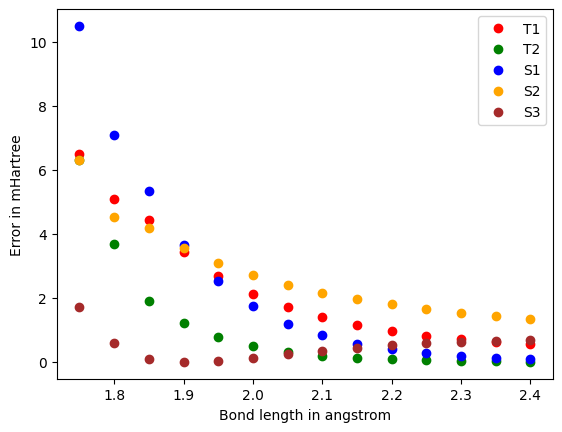

In [8]:
# Plot.
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(0)
plt.plot(bond_lengths, abs(fci_energies[:,1]-triplet[:,1])*1000, 'o', label='T1', color='red')
plt.plot(bond_lengths, abs(fci_energies[:,2]-triplet[:,2])*1000, 'o', label='T2', color='green')
plt.plot(bond_lengths, abs(fci_energies[:,3]-singlet[:,1])*1000, 'o', label='S1', color='blue')
plt.plot(bond_lengths, abs(fci_energies[:,4]-singlet[:,2])*1000, 'o', label='S2', color='orange')
plt.plot(bond_lengths, abs(fci_energies[:,5]-singlet[:,3])*1000, 'o', label='S3', color='brown')

plt.ylabel('Error in mHartree')
plt.xlabel('Bond length in angstrom')
plt.legend()
plt.show()